In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_models import *
from skimage import metrics

/net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /net/dali/home/mscbio/aar126/.conda/envs/dehaze/lib/python3.9/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  warn(f"Failed to load image Python extension: {e}")


In [2]:
_, models_avail = getHelp()

Models available: 
 LightDehazeNet 
 LightDehazeNet_KL 
 LighDehazeNet_GL 
 LightDehazeNet_MI 
 LightDehaze_Net_Attn, LightDehazeNet_Attn_Conv, LightDehazeNet_Attn_Conv_Big


In [3]:
models_avail

['LightDehazeNet',
 'LightDehazeNet_KL',
 'LighDehazeNet_GL',
 'LightDehazeNet_MI',
 'LightDehazeNet_Attn',
 'LightDehazeNet_Attn_Conv',
 'LightDehazeNet_Attn_Conv_Big']

In [4]:

# current folder
cur_folder = 'src'

# storing paths as string
main_dir = str(os.getcwd()[:-len(cur_folder)])

weight_dir = main_dir + 'weights_batch4/'
dirs = {models_avail[0] : weight_dir + str.lower(models_avail[0]) + '/', 
        models_avail[1] : weight_dir + str.lower(models_avail[0]) + '_KL/',
       models_avail[2] : weight_dir + str.lower(models_avail[0]) + '_GL/',
        #models_avail[3] : weight_dir + str.lower(models_avail[0]) + '_MI/',
       models_avail[4] : weight_dir + str.lower(models_avail[4]) + '/', 
        models_avail[5] : weight_dir + str.lower(models_avail[5]) + '/',
       models_avail[6] : weight_dir + str.lower(models_avail[6]) + '/'}

In [5]:
files = ['per_epoch_train.csv', 'per_epoch_val.csv', 'train_loss_all.csv', 'val_loss_all.csv']

In [6]:
mdl_losses = {x : [] for x in dirs}

losses = pd.DataFrame()

for m in list(dirs.keys()):
    mdl_losses[m] = {'train': pd.read_csv(dirs[m] + files[0]), 'val':pd.read_csv(dirs[m] + files[1])}
    losses = losses.append(mdl_losses[m], ignore_index = True)

/tmp/ipykernel_3466736/3807474912.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses = losses.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/3807474912.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses = losses.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/3807474912.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses = losses.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/3807474912.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses = losses.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/3807474912.py:7: FutureWarning: The frame

In [7]:

losses_long = pd.DataFrame()

for m in list(dirs.keys()):
    mdl_losses[m] = {'train': pd.read_csv(dirs[m] + files[2]), 'val':pd.read_csv(dirs[m] + files[1])}
    losses_long = losses_long.append(mdl_losses[m], ignore_index = True)

/tmp/ipykernel_3466736/1742764019.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_long = losses_long.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/1742764019.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_long = losses_long.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/1742764019.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_long = losses_long.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/1742764019.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  losses_long = losses_long.append(mdl_losses[m], ignore_index = True)
/tmp/ipykernel_3466736/1

In [8]:
# train batch size is 9800
losses_long['train'][0]

,Unnamed: 0,0
0,0,0.558378
1,1,0.252612
2,2,0.287201
3,3,0.238964
4,4,0.228073
...,...,...
97995,97995,0.022458
97996,97996,0.021054
97997,97997,0.015731
97998,97998,0.012111


In [17]:
# figure 1: training loss vs validation loss at each epoch

# for i, k in enumerate(dirs):
# not ready yet

for x in range(len(list(mdl_losses.keys()))):
    plt.figure()
    plt.plot(losses['train'][x]['0'], label = "train")
    plt.plot(losses['val'][x]['0'], label = "val")
    plt.title(list(mdl_losses.keys())[x])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(str(list(mdl_losses.keys())[x]) + '_epoch_loss.png')
    plt.close()

In [ ]:
# img comparison
losses

In [24]:
# load training/validation data
img_dirs = {'hazy' : main_dir + 'reside/hazy/', 'clear' : main_dir + 'reside/clear/'}
train_data, validation_data, test_data = preparing_training_data(img_dirs['clear'], img_dirs['hazy'])

In [8]:
len(train_data)


9800

In [25]:
weight_dirs_pth = {models_avail[0] : weight_dir + str.lower(models_avail[0]) + '/39_', 
        models_avail[1] : weight_dir + str.lower(models_avail[0]) + '_KL/39_',
       models_avail[2] : weight_dir + str.lower(models_avail[0]) + '_GL/39_',
        models_avail[3] : weight_dir + str.lower(models_avail[0]) + '_MI/39_',
       models_avail[4] : weight_dir + str.lower(models_avail[4]) + '/39_', 
        models_avail[5] : weight_dir + str.lower(models_avail[5]) + '/39_',
       models_avail[6] : weight_dir + str.lower(models_avail[6]) + '/39_'}

mdls = {'lhd' : LightDehazeNet(weight_dirs_pth[list(dirs.keys())[0]]), 
        'KL' : LightDehazeNet_KL(weight_dirs_pth[list(dirs.keys())[1]]), 
        'GL' : LightDehazeNet_GL(weight_dirs_pth[list(dirs.keys())[2]]),
#         'MI' : LightDehazeNet_MI(weight_dirs_pth[list(dirs.keys())[3]]),
        'attn': LightDehazeNet_Attn(weight_dirs_pth[list(dirs.keys())[3]]),
        'attn_conv': LightDehazeNet_Attn_Conv(weight_dirs_pth[list(dirs.keys())[4]]),
        'attn_conv_big': LightDehazeNet_Attn_Conv_Big(weight_dirs_pth[list(dirs.keys())[5]])}



In [26]:
# iterate through test data
psnr_dict = {x : [] for x in list(mdls.keys())}
ssim_dict = {x : [] for x in list(mdls.keys())}
for i, [clear, hazy] in enumerate(test_data):
    
    hazy_image = np.array(Image.open(hazy))
    clear_image = np.array(Image.open(clear))

    for m in list(psnr_dict.keys()):
        
        dehazed = (mdls[m].image_haze_removel(hazy_image))[0, :, : :].permute(1, 2, 0)
        
        psnr_dict[m].append(metrics.peak_signal_noise_ratio(clear_image/255.0, dehazed.cpu().data.numpy()))
        ssim_dict[m].append(metrics.structural_similarity(clear_image/255.0, dehazed.cpu().data.numpy() ,multichannel = True))
        
        
#         psnr_dict[m].append(cv2.PSNR(dehazed.cpu().data.numpy(), clear_image))
#         psnr_dict[m].append(compute_psnr(dehazed.cpu().data.numpy(), clear_image))


/tmp/ipykernel_1814227/1425624761.py:13: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  psnr_dict[m].append(metrics.peak_signal_noise_ratio(clear_image/255.0, dehazed.cpu().data.numpy()))
/tmp/ipykernel_1814227/1425624761.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_dict[m].append(metrics.structural_similarity(clear_image/255.0, dehazed.cpu().data.numpy() ,multichannel = True))


In [27]:
psnr_df = pd.DataFrame.from_dict(psnr_dict, orient="index")
psnr_df.to_csv('psnr_df.csv')

ssim_df = pd.DataFrame.from_dict(ssim_dict, orient="index")
ssim_df.to_csv('ssim_df.csv')

In [28]:
for p, s in zip(list(psnr_dict.keys()), list(ssim_dict.keys())):
    print(p)
    print('psnr:' + str(np.array(psnr_dict[p]).mean()))
    print(' ssim:' + str(np.array(ssim_dict[p]).mean()))

lhd
psnr:18.151829456283792
 ssim:0.8030419931980964
KL
psnr:18.245283072815468
 ssim:0.8178019462800099
GL
psnr:17.99771760570524
 ssim:0.7928901999291945
attn
psnr:18.12478820565566
 ssim:0.800988503141274
attn_conv
psnr:18.217716933505056
 ssim:0.8081946791743859
attn_conv_big
psnr:18.012484783549244
 ssim:0.793916293242307


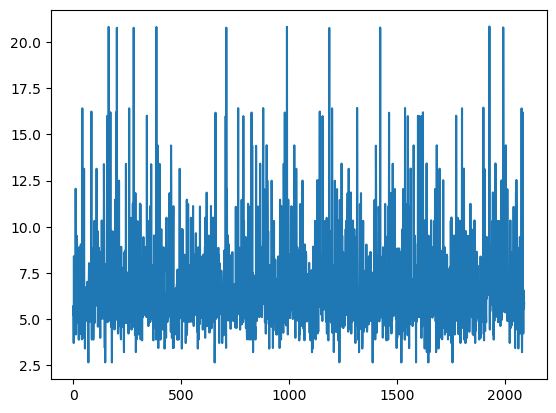

/tmp/ipykernel_1806579/2333041959.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  plt.plot(pd.Series(psnr_dict[m]), label = m)


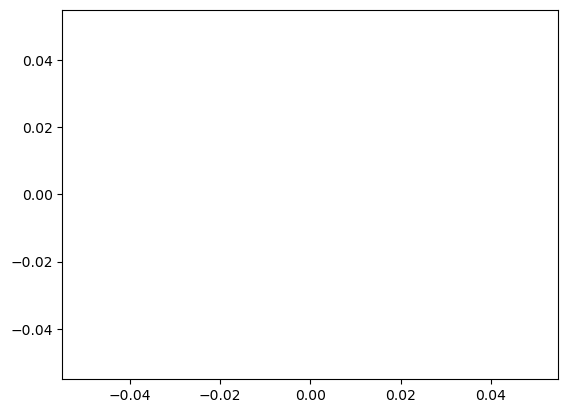

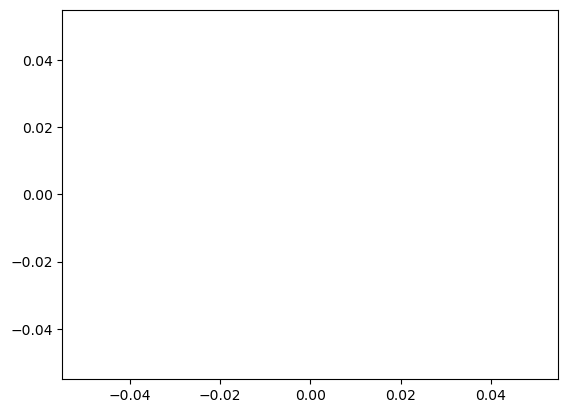

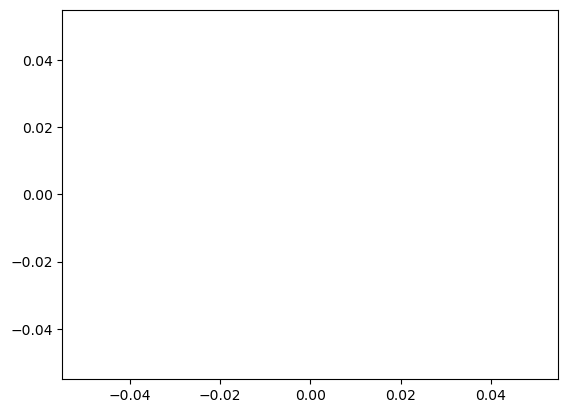

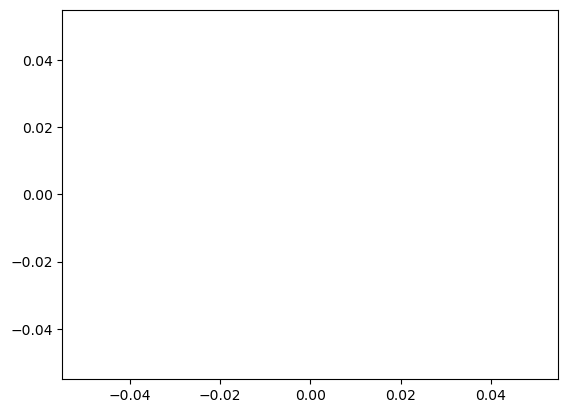

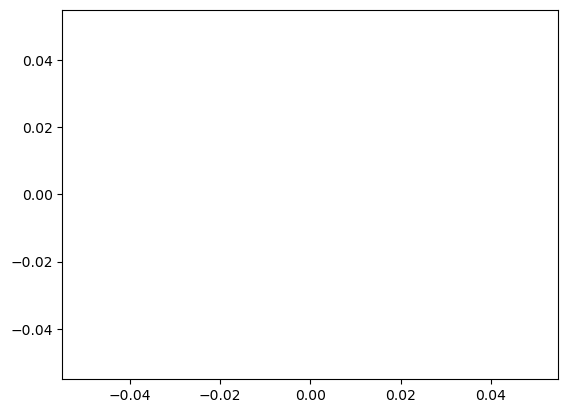

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


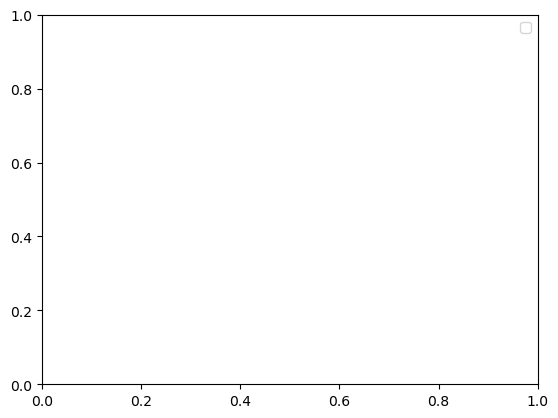

In [12]:
# go through training data for each model:
plt.figure()

for m in list(psnr_dict.keys()):
    plt.plot(pd.Series(psnr_dict[m]), label = m)
    plt.show()
plt.legend()


In [ ]:

for m in list(psnr_dict.keys()):
#     plt.plot(pd.Series(psnr_dict[m]), label = m)
    
    print(m + str(np.mean(psnr_dict[m])))



In [ ]:
for x in range(len(list(mdl_losses.keys()))):
    plt.figure()
    plt.plot(losses['train'][x]['0'], label = "train")
    plt.plot(losses['val'][x]['0'], label = "val")
    plt.legend()
    plt.show()

In [ ]:
hazy_image = np.array(Image.open(test_data[2][1]))
clear_image = np.array(Image.open(test_data[2][0]))

for m in list(psnr_dict.keys()):
    fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize = (8, 8))
    dehazed = (mdls[m].image_haze_removel(hazy_image))[0, :, : :].permute(1, 2, 0)
    ax0.imshow(dehazed.cpu().data.numpy())
    ax1.imshow(hazy_image)
    ax2.imshow(clear_image)

In [ ]:
test_data[1]